In [168]:
from fmp_data import FMPPriceLoader

pl = FMPPriceLoader()
spx = pl.get_close_price_during('^SPX', '2020-01-01', '2024-11-01')
spx_price = np.array(list(spx.values()))
spx_returns = np.diff(spx_price) / spx_price[:-1]

# Calculate mean and standard deviation of SPX returns
mean_return = np.mean(spx_returns)
std_return = np.std(spx_returns)

# Generate 2000 samples from a Gaussian distribution with same mean and std
gaussian = np.random.normal(mean_return, std_return, 10000)

def get_returns(sym):
    prices = np.array(list(pl.get_close_price_during(sym, '2020-01-01', '2024-11-01').values()))
    return np.diff(prices) / prices[:-1]



In [12]:
def build_frac(x0, y0, x1, y1, wp1, wp2, hp1, hp2):
    assert x1 >= x0, f"{x0}, {y0}, {x1}, {y1}"
    assert 0 < wp1 < 1 and 0 < wp2 < 1 and wp1 + wp2 < 1, f"{wp1}, {wp2}, {wp1+wp2}"
    if x1 - x0 < 10:
        return [y0, y1]
    width = x1 - x0
    height = y1 - y0
    w1 = int(width * wp1)
    w2 = int(width * wp2)
    h1 = int(height * hp1)
    h2 = int(height * hp2)
    f1 = build_frac(x0, y0, x0+w1, y0+h1, wp1, wp2, hp1, hp2)
    f2 = build_frac(x0+w1, y0+h1, x0+w1+w2, y0+h1+h2, wp1, wp2, hp1, hp2)
    f3 = build_frac(x0+w1+w2, y0+h1+h2, x1, y1, wp1, wp2, hp1, hp2)

    return f1 + f2 + f3

In [29]:
f = build_frac(0, 0, 1000000, 100, 0.5, 0.4, 0.8, -0.7)

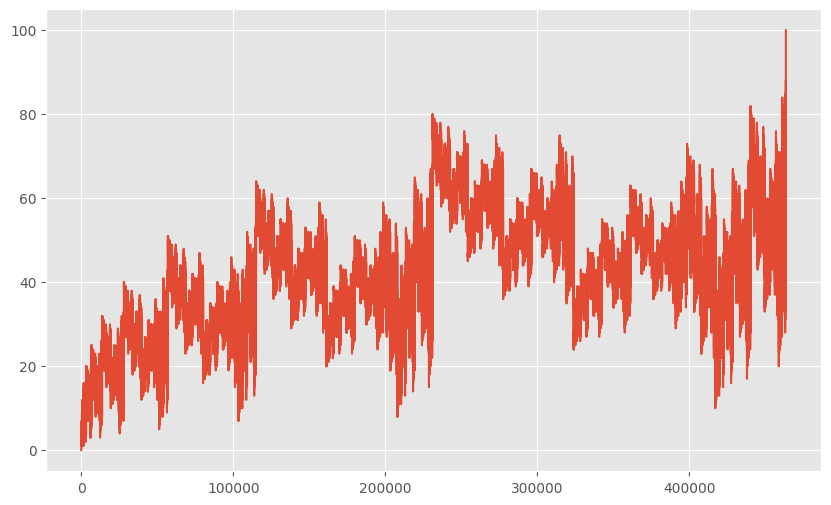

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(f, '-')

In [181]:
from numpy import negative


def plot_return_survival(pos, neg, ab):
    # Create a 1x3 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 6))
    
    # Plot positive returns survival function
    axs[0].loglog(pos, np.arange(1, len(pos) + 1) / len(pos), 'r*-')
    axs[0].set_title('Positive Returns')
    axs[0].set_xlabel('Return Magnitude')
    axs[0].set_ylabel('Survival Count')
    axs[0].grid(True, which="both", ls="--", alpha=0.5)
    
    # Plot negative returns survival function
    axs[1].loglog(neg, np.arange(1, len(neg) + 1) / len(neg), 'g*-')
    axs[1].set_title('Negative Returns')
    axs[1].set_xlabel('Return Magnitude')
    axs[1].set_ylabel('Survival Count')
    axs[1].grid(True, which="both", ls="--", alpha=0.5)
    
    # Plot absolute returns survival function
    axs[2].loglog(ab, np.arange(1, len(ab) + 1) / len(ab), 'b*-')
    axs[2].set_title('Absolute Returns')
    axs[2].set_xlabel('Return Magnitude')
    axs[2].set_ylabel('Survival Count')
    axs[2].grid(True, which="both", ls="--", alpha=0.5)
    
    plt.tight_layout()
    


def analysis(returns):
    extreme_limit = 3
    std = np.std(returns)
    mean = np.mean(returns)
    positive_r = sorted([r for r in returns if r >= extreme_limit * std + mean], reverse=True)
    negative_r = sorted([-r for r in returns if r <= mean - extreme_limit * std], reverse=True)
    abs_r = sorted([abs(r) for r in returns if abs(r) >= extreme_limit * std], reverse=True)
    positive_r = [r for r in positive_r if r ]
    plot_return_survival(positive_r, negative_r, abs_r)

def bell_check(returns):
    # Calculate mean and standard deviation
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    
    # Create histogram of returns
    plt.figure(figsize=(8, 4))
    n, bins, patches = plt.hist(returns, bins=70, density=True, alpha=0.7, color='blue')
    
    # Generate Gaussian distribution with same mean and std
    x = np.linspace(min(returns), max(returns), 100)
    gaussian_dist = stats.norm.pdf(x, mean_return, std_return)
    
    # Plot the Gaussian overlay
    plt.plot(x, gaussian_dist, 'r-', linewidth=2)
    
    # Add labels and title
    plt.title(f'Return Distribution (Mean={mean_return:.4f}, STD={std_return:.4f})')
    plt.xlabel('Returns')
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    plt.legend(['Gaussian Fit', 'Actual Returns'])
    
    plt.tight_layout()
    


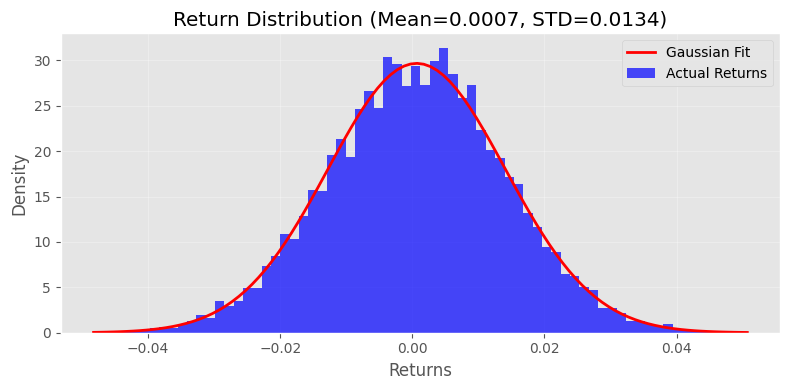

In [182]:
bell_check(gaussian)

(np.float64(0.0005564808864621595), np.float64(0.013569902872028557))

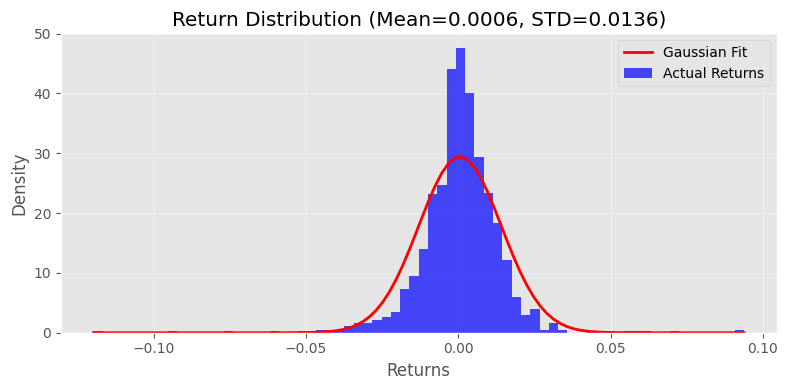

In [159]:
bell_check(spx_returns)

(np.float64(0.0011228056628387495), np.float64(0.020197729360977034))

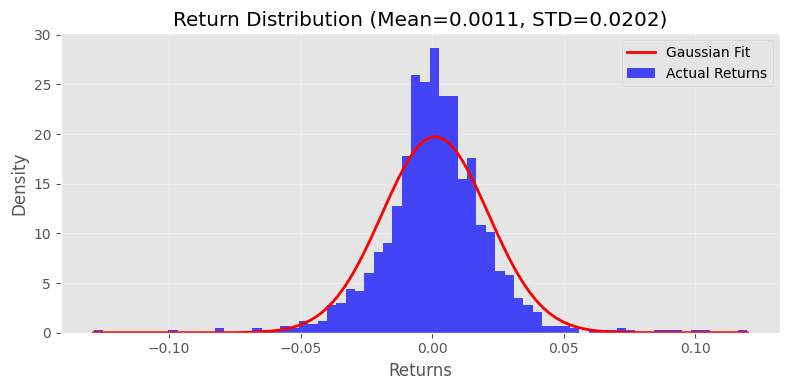

In [180]:
bell_check(get_returns('AAPL'))

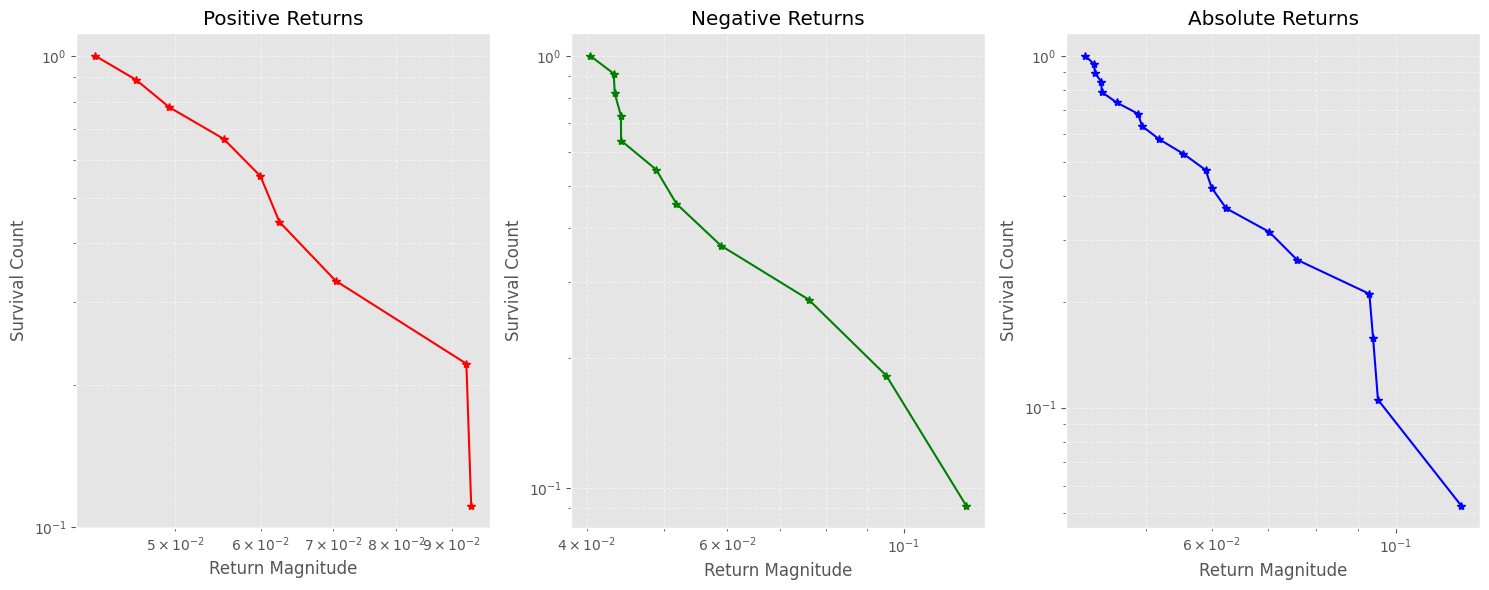

In [177]:
analysis(spx_returns)

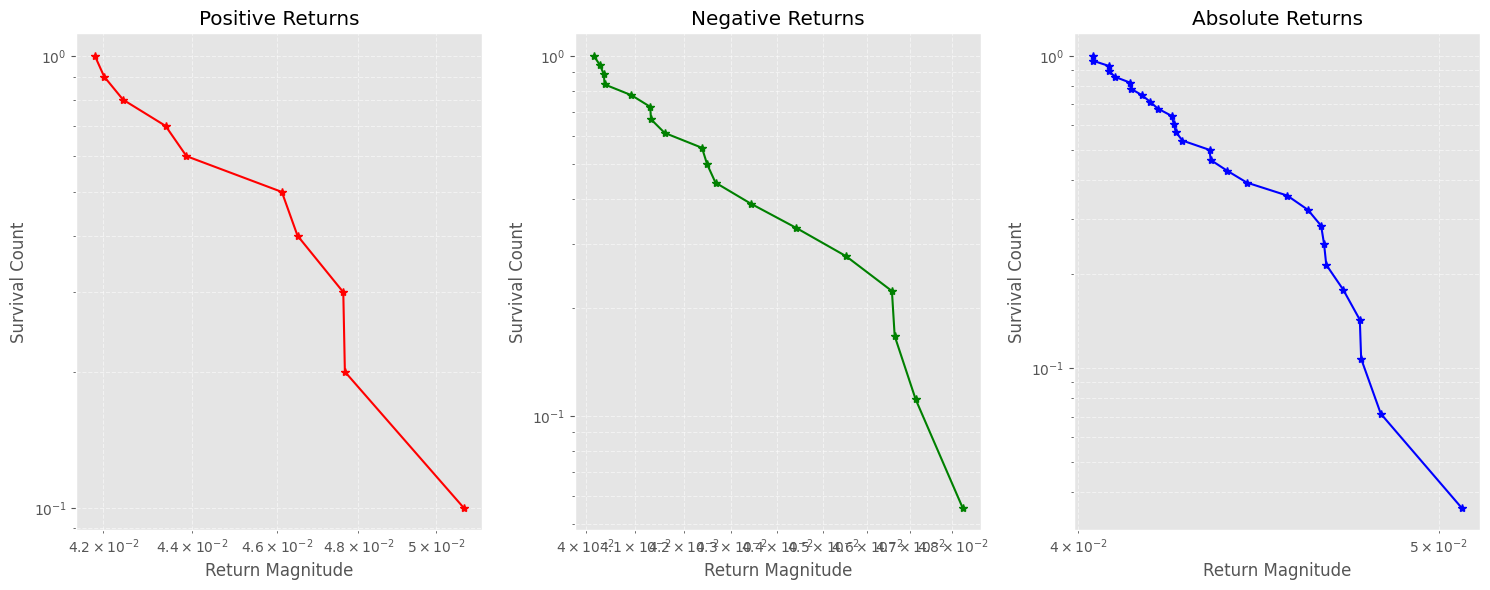

In [178]:
analysis(gaussian)

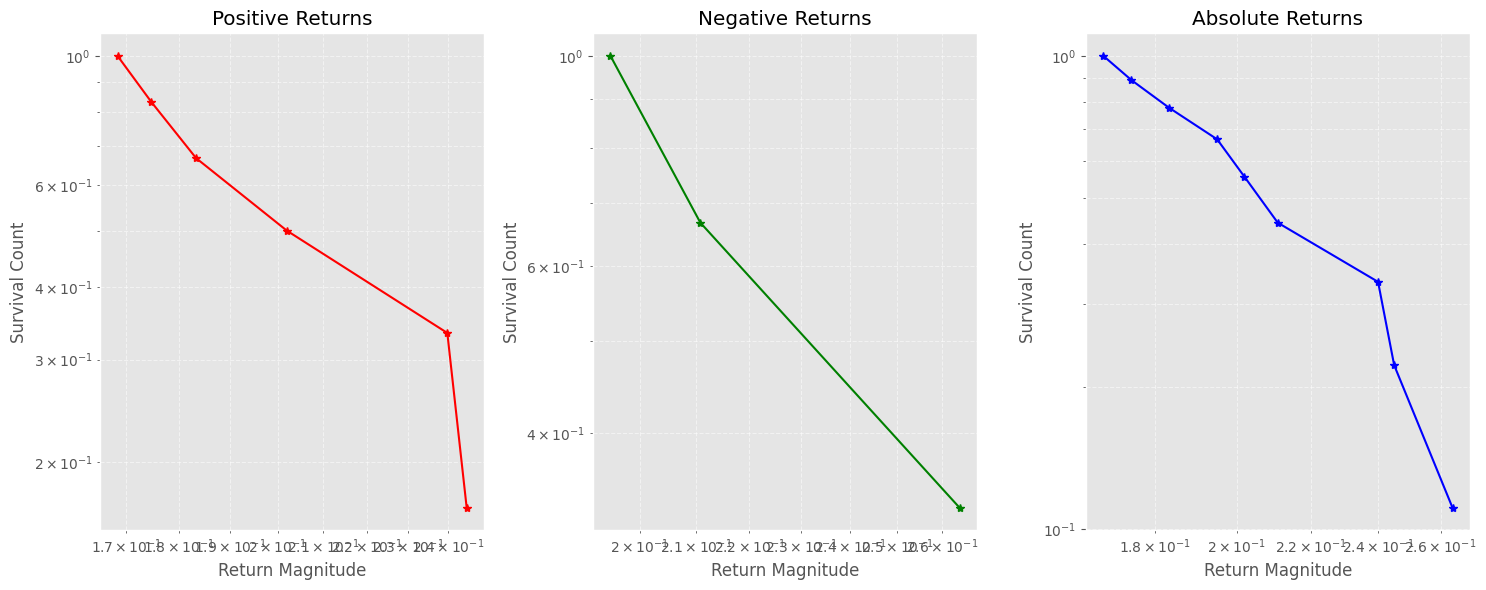

In [179]:
analysis(get_returns('COIN'))

In [126]:
min(get_returns('COIN'))

np.float64(-0.26400873445701417)